In [828]:
import torch

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from pandas import Series
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
#register_matplotlib_converters()

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [829]:
df=pd.read_csv("../data/Corona_NLP_train.csv",encoding='ISO-8859-1')

In [830]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [831]:
len(df['TweetAt'])

41157

In [832]:
df1=df[df["Location"].isin(["United States","New York, NY","Washington, DC","Los Angeles, CA","USA","Chicago, IL","California, USA","San Francisco, CA","Boston, MA","New York, USA","Atlanta, GA","New York"])]

In [833]:
df1['TweetAt']=pd.to_datetime(df1['TweetAt'], format="%d-%m-%Y")

C:\Users\stamp\AppData\Local\Temp\ipykernel_6988\1666013083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TweetAt']=pd.to_datetime(df1['TweetAt'], format="%d-%m-%Y")


In [834]:
df1=df1[['TweetAt','Sentiment']]
# change y-axis 
df1['Sentiment'] = df1['Sentiment'].replace(['Extremely Negative','Negative','Neutral','Positive','Extremely Positive'],[-2.0,-1.0,0.0,1.0,2.0])
# change it to float
df1['Sentiment']=df1['Sentiment'].astype(float)

# get the mean of each day
df1=df1.groupby('TweetAt').mean()


In [835]:
df2=df1.reset_index()

In [836]:
#df2 = df2.drop(df2.columns[[1]], axis=1)


In [837]:
df2

,TweetAt,Sentiment
0,2020-03-16,0.281250
1,2020-03-17,0.225000
2,2020-03-18,0.015464
3,2020-03-19,0.220588
4,2020-03-20,0.076923
5,2020-03-21,0.145833
6,2020-03-22,0.443609
7,2020-03-23,0.375887
8,2020-03-24,0.146067
9,2020-03-25,0.215596


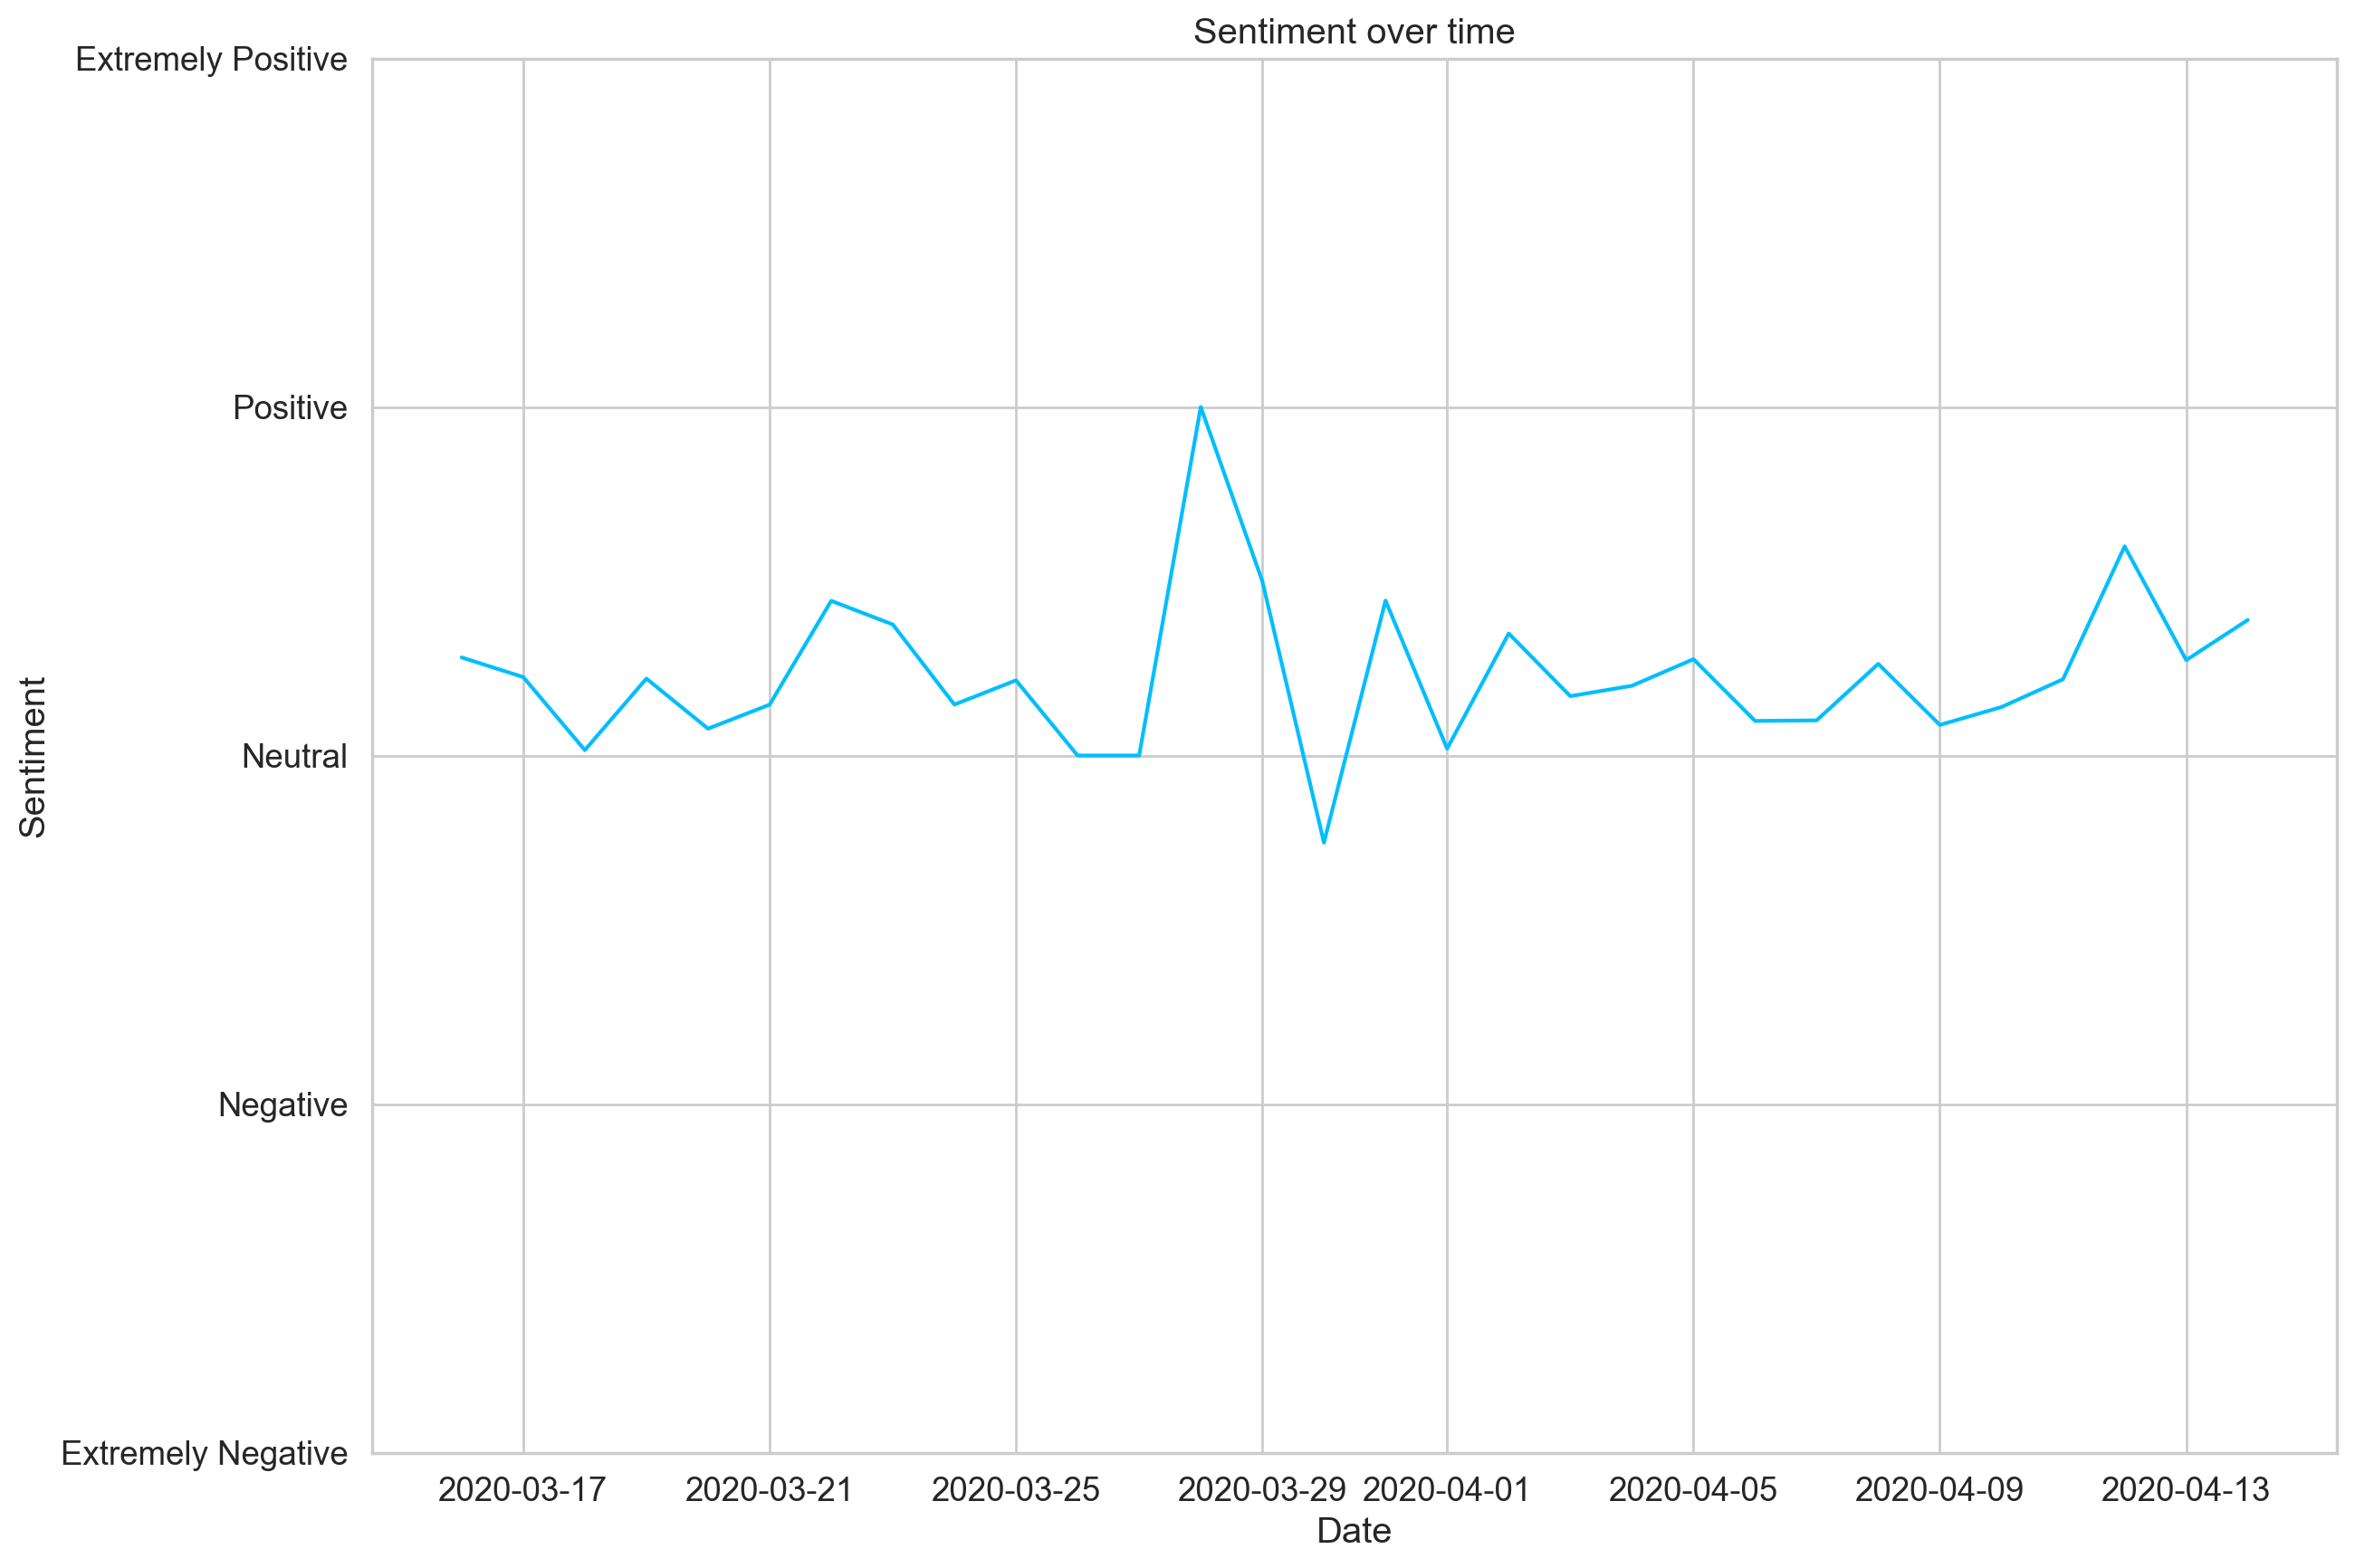

In [838]:




# plot the data
plt.plot(df2['TweetAt'], df2['Sentiment'])
plt.xlabel('Date')
plt.ylabel('Sentiment')

# add title
plt.yticks([-2,-1,0,1,2],['Extremely Negative','Negative','Neutral','Positive','Extremely Positive'])



plt.title('Sentiment over time')
plt.show()

In [839]:
df_old=pd.read_csv('../data/time_series_covid19_confirmed_US.csv')

In [840]:
df_old.loc[:, '3/16/20':'4/14/20']

,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,0,0,0,0,0,0,0,0,1,5,...,12,12,12,12,17,18,19,19,19,23
1,1,1,1,1,2,2,2,3,5,5,...,39,43,47,54,63,64,70,75,82,93
2,0,0,0,0,0,0,0,0,0,0,...,3,4,4,4,8,9,10,10,10,11
3,0,0,0,0,0,0,0,0,0,0,...,7,7,8,9,11,11,13,16,17,18
4,0,0,0,0,0,0,0,0,0,3,...,13,13,13,13,15,15,15,17,18,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,0,0,0,1,2,2,2,2,2,5,...,39,40,41,44,45,50,53,56,56,57
3338,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,3,4,4,4,4,4
3339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,0,0,0,0,0,0,0,0,0,0,...,4,4,4,5,5,5,5,5,5,5
